In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#obtain the test data
tickers = "COFF.L GS C ALAB ICLN FCFS GBPG.L XGBE.MI RDY HDB CTEC.AS"
df_assets = yf.download(tickers=tickers, start="2024-06-01", end="2025-01-01", interval="1d")
df = df_assets["Close"]
df.dropna(inplace=True)
df.head()

[*********************100%***********************]  11 of 11 completed
<ipython-input-2-fb76466c3d01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Ticker,ALAB,C,COFF.L,CTEC.AS,FCFS,GBPG.L,GS,HDB,ICLN,RDY,XGBE.MI
Date,,,,,,,,,,,
2024-06-03,63.619999,60.372734,36.805000,3.5815,116.755264,42.629238,450.074524,61.230000,14.837432,13.484409,26.115000
2024-06-04,61.209999,59.504982,37.935001,3.6083,113.795403,42.732117,450.391022,55.509998,14.699683,13.348497,26.105000
2024-06-05,62.209999,60.226490,37.825001,3.6331,115.245529,42.727219,456.702240,58.430000,14.817755,13.499942,26.150000
2024-06-06,63.009998,60.392242,38.355000,3.6438,114.063576,42.776203,453.160858,59.080002,14.670167,13.659153,26.125000
2024-06-07,61.939999,60.236237,36.740002,3.5632,111.709602,42.609646,450.005249,59.090000,14.296279,13.855255,26.049999


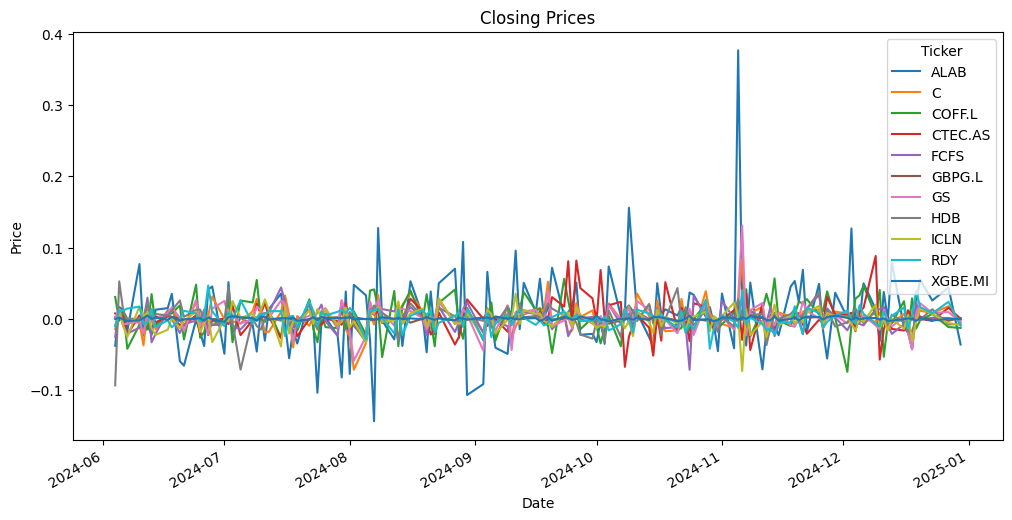

In [3]:
# plot
df_pct_change = df.pct_change()
df_pct_change.plot(figsize=(12, 6))
plt.title("Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [4]:
#obtain portfolio
portfolio_weights = np.array([0.02, 0.0714, 0.02, 0.15, 0.15, 0.02, 0.02, 0.15, 0.1325, 0.11332, 0.15])
starting_capital = 2000000
portfolio_allocation = portfolio_weights * starting_capital
print("\nPortfolio Allocation per Asset:")
print(portfolio_allocation)


Portfolio Allocation per Asset:
[ 40000. 142800.  40000. 300000. 300000.  40000.  40000. 300000. 265000.
 226640. 300000.]


In [5]:
#use the first available closing prices as the entry price for each asset
initial_prices = df.iloc[0]
shares = portfolio_allocation / initial_prices
print("\nNumber of shares purchased for each asset:")
print(shares)


Number of shares purchased for each asset:
Ticker
ALAB         628.733113
C           2365.306163
COFF.L      1086.808848
CTEC.AS    83763.784874
FCFS        2569.477289
GBPG.L       938.323126
GS            88.874171
HDB         4899.559076
ICLN       17860.233607
RDY        16807.558597
XGBE.MI    11487.650876
Name: 2024-06-03 00:00:00, dtype: float64


In [6]:
portfolio_value = (df * shares).sum(axis=1)
daily_returns = portfolio_value.pct_change().dropna()
cumulative_returns = portfolio_value / starting_capital - 1

In [7]:
final_value = portfolio_value.iloc[-1]
total_return = cumulative_returns.iloc[-1] * 100  # in percentage

print(f"\nFinal portfolio value: ${final_value:,.2f}")
print(f"Total return over the period: {total_return:.2f}%")


Final portfolio value: $2,087,606.26
Total return over the period: 4.38%


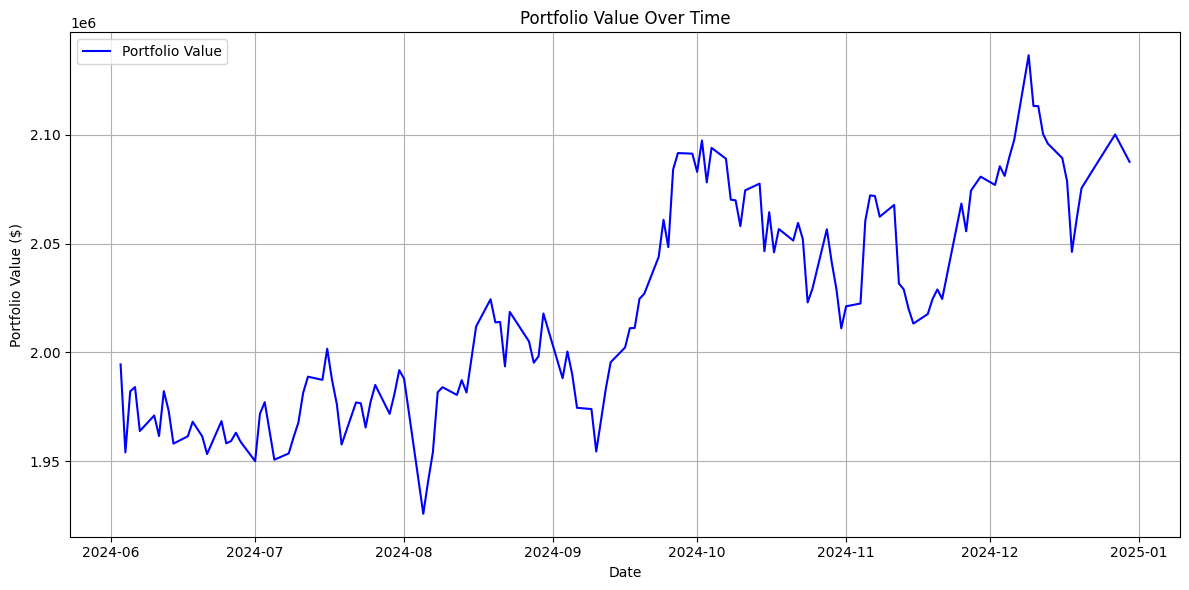

In [8]:
# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value, label="Portfolio Value", color="blue")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df_SPY = yf.download("SPY", start="2024-06-01", end="2025-01-01", interval="1d")["Close"]
df_SPY.dropna(inplace=True)

# On the same initial day (the portfolio_value.index[0]),
# invest the entire starting capital in SPY
SPY_initial_price = df_SPY.iloc[0]
SPY_shares = starting_capital / SPY_initial_price

#Compute returns
SPY_portfolio_value = df_SPY * SPY_shares
SPY_cum_returns = SPY_portfolio_value / starting_capital - 1


final_value_portfolio = portfolio_value.iloc[-1]
final_value_SPY = SPY_portfolio_value.iloc[-1]
print(f"\nFinal portfolio value: ${final_value_portfolio:,.2f}")
print(f"Final SPY value (all-in SPY): ${final_value_SPY.iloc[-1]:,.2f}")

final_cum_return_portfolio = cumulative_returns.iloc[-1] * 100
final_cum_return_SPY = SPY_cum_returns.iloc[-1] * 100
print(f"Portfolio total return: {final_cum_return_portfolio:.2f}%")
print(f"SPY total return: {float(final_cum_return_SPY):.2f}%")


[*********************100%***********************]  1 of 1 completed


Final portfolio value: $2,087,606.26
Final SPY value (all-in SPY): $2,242,361.86
Portfolio total return: 4.38%
SPY total return: 12.12%



<ipython-input-9-22854e825af9>:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"SPY total return: {float(final_cum_return_SPY):.2f}%")


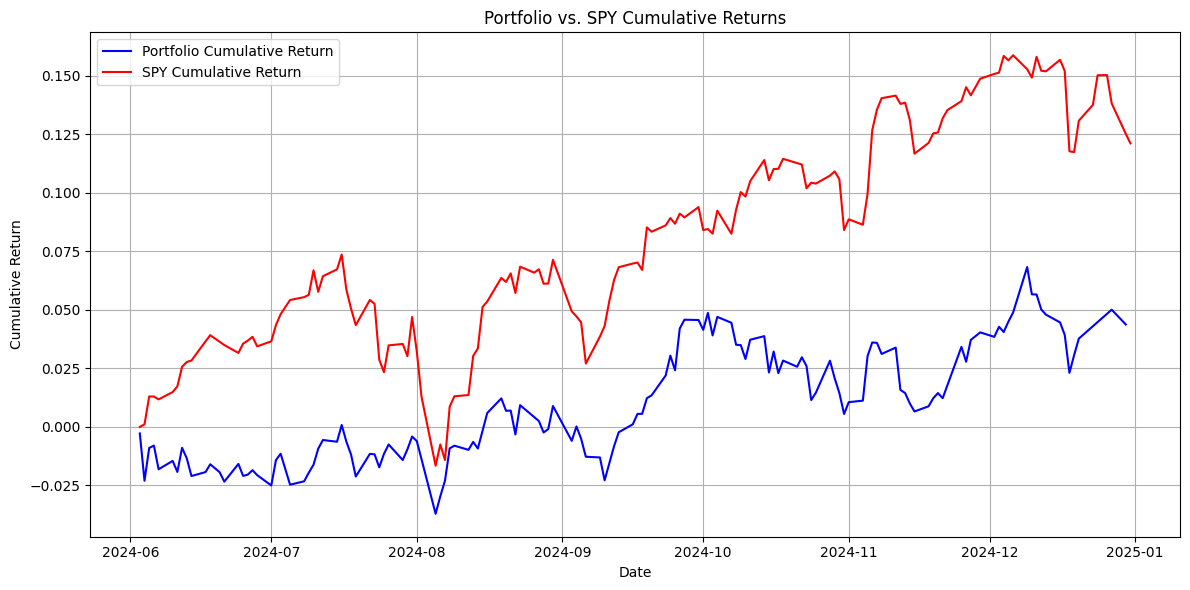

In [10]:
# Plot both cumulative returns on the same chart
plt.figure(figsize=(12, 6))

plt.plot(cumulative_returns.index,
         cumulative_returns,
         label="Portfolio Cumulative Return",
         color="blue")
plt.plot(SPY_cum_returns.index,
         SPY_cum_returns,
         label="SPY Cumulative Return",
         color="red")

plt.title("Portfolio vs. SPY Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
